In [ ]:
import numpy as np
from keras.models import load_model
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

from keras import backend as K
import tensorflow as tf
from sklearn.decomposition import PCA
import numpy as np


def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives +
    K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [ ]:
from keras.utils import get_custom_objects
from keras.preprocessing.image import ImageDataGenerator

train_path = '/content/drive/MyDrive/TeaLeafDatasetForML22Mar/'
valid_path = '/content/drive/MyDrive/TeaLeafDatasetForML22Mar/'
test_path = '/content/drive/MyDrive/TeaLeafDatasetForML22Mar/'


get_custom_objects().update({'f1_m': f1_m,'precision_m':precision_m, 'recall_m':recall_m})

train_batches_vgg16 = ImageDataGenerator( rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest',preprocessing_function=tf.keras.applications.vgg16.preprocess_input
).flow_from_directory(train_path, target_size=(224,224), batch_size=10,shuffle=False)
#valid_batches_vgg16 = ImageDataGenerator(rescale=1./255,preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(valid_path, target_size=(224,224), batch_size=10)
#test_batches_vgg16 = ImageDataGenerator(rescale=1./255,preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(test_path, target_size=(224,224), batch_size=10,shuffle=False)

train_batches_googlenet = ImageDataGenerator( rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest',preprocessing_function=tf.keras.applications.vgg16.preprocess_input
).flow_from_directory(train_path, target_size=(224,224), batch_size=10,shuffle=False)
#valid_batches_googlenet = ImageDataGenerator(rescale=1./255,preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(valid_path, target_size=(224,224), batch_size=10)
#test_batches_googlenet = ImageDataGenerator(rescale=1./255,preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(test_path, target_size=(224,224), batch_size=10,shuffle=False)


train_batches_resnet = ImageDataGenerator(rescale=1./255,preprocessing_function=tf.keras.applications.resnet50.preprocess_input).flow_from_directory(train_path, target_size=(224,224), batch_size=10,shuffle=False)
#valid_batches_resnet = ImageDataGenerator(preprocessing_function=tf.keras.applications.resnet50.preprocess_input).flow_from_directory(valid_path, target_size=(224,224), batch_size=10)
#test_batches_resnet = ImageDataGenerator(rescale=1./255,preprocessing_function=tf.keras.applications.resnet50.preprocess_input).flow_from_directory(test_path, target_size=(224,224), batch_size=10,shuffle=False)


Found 895 images belonging to 8 classes.
Found 895 images belonging to 8 classes.
Found 895 images belonging to 8 classes.


In [ ]:



import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.callbacks import LearningRateScheduler
from keras.metrics import categorical_crossentropy
from keras.layers import Activation
from keras.utils import get_custom_objects

import matplotlib.pyplot as plt
import os
import shutil
import random
import glob
import math
import tensorflow as tf
%matplotlib inline

from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import sklearn.metrics as metrics
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Flatten, Reshape
from keras.utils import Sequence
from keras.activations import softmax
from sklearn.preprocessing import MinMaxScaler
from keras.layers import concatenate, Dense, Input, GlobalAveragePooling2D
from keras.layers import Concatenate

import keras
from keras.models import Model
from keras.layers import concatenate, Dense, Input, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.initializers import glorot_uniform

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import backend as K

In [ ]:
model1 = load_model('/content/drive/MyDrive/TeaLeafNet26Mar-8_update_resnet50login.h5')

class EnsembleGenerator(Sequence):
    def __init__(self, gen1, gen2, gen3):
        self.gen1 = gen1
        self.gen2 = gen2
        self.gen3 = gen3

    def __len__(self):
        return len(self.gen1)

    def __getitem__(self, idx):
        X1, y1 = self.gen1[idx]
        X2, y2 = self.gen2[idx]
        X3, y3 = self.gen3[idx]
        return [X1, X2, X3], y1  # or y2 or y3, since they should all have the same labels

true_labels=train_batches_vgg16.classes
print("true label shape : ",true_labels.shape)
test_generator=EnsembleGenerator(train_batches_googlenet,train_batches_vgg16,train_batches_resnet)



input_layer = model1.input
output_layer = model1.layers[-2].output
new_model = Model(inputs=input_layer, outputs=output_layer)
new_model.summary()
features=new_model.predict(test_generator)

print("features shape : ", features.shape)

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


true label shape :  (895,)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 resnet50_input_7 (InputLayer)  [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 resnet50_zero_padding2d_6 (Zer  (None, 230, 230, 3)  0          ['resnet50_input_7[0][0]']       
 oPadding2D)                                                                                      
                                                                                                  
 resnet50_conv1 (Conv2D)        (None, 112, 112, 64  9472        ['resnet50_zero_padding2d_6[0][0]
                                )                                ']

In [ ]:
#apply pca
n_components = 65
pca = PCA(n_components=n_components)
pca.fit(features)
transformed_data = pca.transform(features)
print("transformed_data.shape : ",transformed_data.shape)


transformed_data.shape :  (895, 65)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

def evaluate_classification(true_labels, pred_labels, class_labels_integer, class_labels_actual):
    # Generate confusion matrix
    cm = confusion_matrix(true_labels, pred_labels, labels=class_labels_integer)

    # Generate classification report
    cr = classification_report(true_labels, pred_labels, labels=class_labels_integer, target_names=class_labels_actual, output_dict=True)
    print(classification_report(true_labels, pred_labels, labels=class_labels_integer, target_names=class_labels_actual))
    # Extract precision, recall, accuracy, and f1-score from classification report
    precision = [cr[class_labels_actual[label]]['precision'] for label in range(len(class_labels_actual))]
    recall = [cr[class_labels_actual[label]]['recall'] for label in range(len(class_labels_actual))]
    f1 = [cr[class_labels_actual[label]]['f1-score'] for label in range(len(class_labels_actual))]
    accuracy = accuracy_score(true_labels, pred_labels)

    # Plot bar graph of precision, recall, accuracy, and f1-score
    x = np.arange(len(class_labels_actual))
    width = 0.2
    fig, ax = plt.subplots(figsize=(12, 12))
    rects1 = ax.bar(x - width, precision, width, label='Precision')
    rects2 = ax.bar(x, recall, width, label='Recall')
    rects3 = ax.bar(x + width, f1, width, label='F1-score')
    ax.set_xticks(x)
    ax.set_xticklabels(class_labels_actual)
    ax.set_xlabel('Class Labels')
    ax.set_ylabel('Score')
    ax.set_title('Classification Metrics')
    ax.legend()

    # Plot bar graph of accuracy, precision, recall, and f1-score
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    metrics = [accuracy, precision_score(true_labels, pred_labels, average='macro'), recall_score(true_labels, pred_labels, average='macro'), f1_score(true_labels, pred_labels, average='macro')]
    labels2 = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    rects4 = ax2.bar(labels2, metrics)
    ax2.set_ylabel('Score')
    ax2.set_title('Aggregate Metrics')

    print('Accuracy: ',accuracy)
    print('Precision',precision_score(true_labels, pred_labels, average='macro'))
    print('Recall : ',recall_score(true_labels, pred_labels, average='macro'))
    print('F1 score : ',f1_score(true_labels, pred_labels, average='macro'))

    # Plot confusion matrix as a heatmap
    fig3, ax3 = plt.subplots(figsize=(8, 8))
    im = ax3.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax3.set(xticks=np.arange(cm.shape[1]),
            yticks=np.arange(cm.shape[0]),
            xticklabels=class_labels_actual, yticklabels=class_labels_actual,
            title='Confusion matrix',
            ylabel='True label',
            xlabel='Predicted label')
    plt.setp(ax3.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax3.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > cm.max() / 2. else "black")
    fig3.tight_layout()
     # Calculate and plot ROC curve
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(class_labels_actual)):
        fpr[i], tpr[i], _ = roc_curve((true_labels == i), (pred_labels == i))
        roc_auc[i] = auc(fpr[i], tpr[i])
    fig2, ax2 = plt.subplots(figsize=(8, 6))
    for i in range(len(class_labels_actual)):
        ax2.plot(fpr[i], tpr[i], label='{} (AUC = {:.2f})'.format(class_labels_actual[i], roc_auc[i]))
    ax2.plot([0, 1], [0, 1], 'k--')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('Receiver Operating Characteristic (ROC) Curve')
    ax2.legend()


    return fig, (precision, recall, f1, accuracy), fig2


Training accuracy: 1.0
               precision    recall  f1-score   support

  Anthracnose       0.74      0.72      0.73        32
   algal leaf       0.96      0.96      0.96        26
bird eye spot       0.81      0.79      0.80        33
 brown blight       0.89      0.85      0.87        40
   gray light       0.86      0.94      0.90        33
      healthy       1.00      0.96      0.98        27
red leaf spot       1.00      1.00      1.00        38
   white spot       0.86      0.90      0.88        40

     accuracy                           0.89       269
    macro avg       0.89      0.89      0.89       269
 weighted avg       0.89      0.89      0.89       269

Accuracy:  0.8884758364312267
Precision 0.8911205944710826
Recall :  0.890065518971769
F1 score :  0.890152955511156


array([6, 4, 4, 6, 0, 2, 2, 3, 1, 1, 1, 6, 4, 2, 3, 7, 5, 6, 3, 1, 2, 4,
       1, 5, 5, 5, 0, 6, 0, 3, 5, 1, 7, 2, 1, 6, 4, 1, 7, 6, 1, 4, 6, 6,
       7, 4, 0, 3, 1, 7, 4, 7, 3, 7, 2, 6, 0, 0, 1, 2, 7, 4, 4, 1, 1, 7,
       0, 3, 5, 0, 0, 2, 4, 7, 7, 5, 7, 7, 3, 2, 4, 0, 3, 4, 1, 2, 2, 0,
       7, 2, 1, 5, 6, 3, 4, 2, 6, 3, 3, 7, 7, 5, 2, 7, 5, 4, 6, 6, 2, 1,
       7, 2, 5, 4, 4, 7, 0, 2, 3, 6, 5, 0, 2, 0, 7, 6, 6, 1, 7, 3, 3, 0,
       4, 7, 7, 7, 2, 0, 6, 0, 7, 7, 3, 5, 7, 3, 0, 4, 2, 6, 5, 5, 6, 1,
       0, 6, 6, 0, 6, 6, 2, 7, 4, 3, 0, 0, 3, 3, 0, 7, 2, 7, 6, 7, 4, 7,
       2, 0, 0, 3, 6, 3, 6, 7, 1, 5, 3, 0, 0, 7, 5, 2, 5, 0, 2, 4, 5, 7,
       7, 5, 3, 6, 5, 6, 7, 5, 6, 3, 6, 4, 3, 3, 3, 5, 3, 0, 5, 1, 4, 3,
       1, 1, 3, 2, 7, 2, 6, 2, 3, 2, 3, 5, 2, 3, 7, 4, 7, 7, 1, 6, 2, 4,
       4, 3, 4, 3, 4, 6, 1, 4, 0, 1, 4, 0, 6, 6, 3, 7, 2, 1, 4, 5, 3, 6,
       6, 4, 4, 4, 4], dtype=int32)

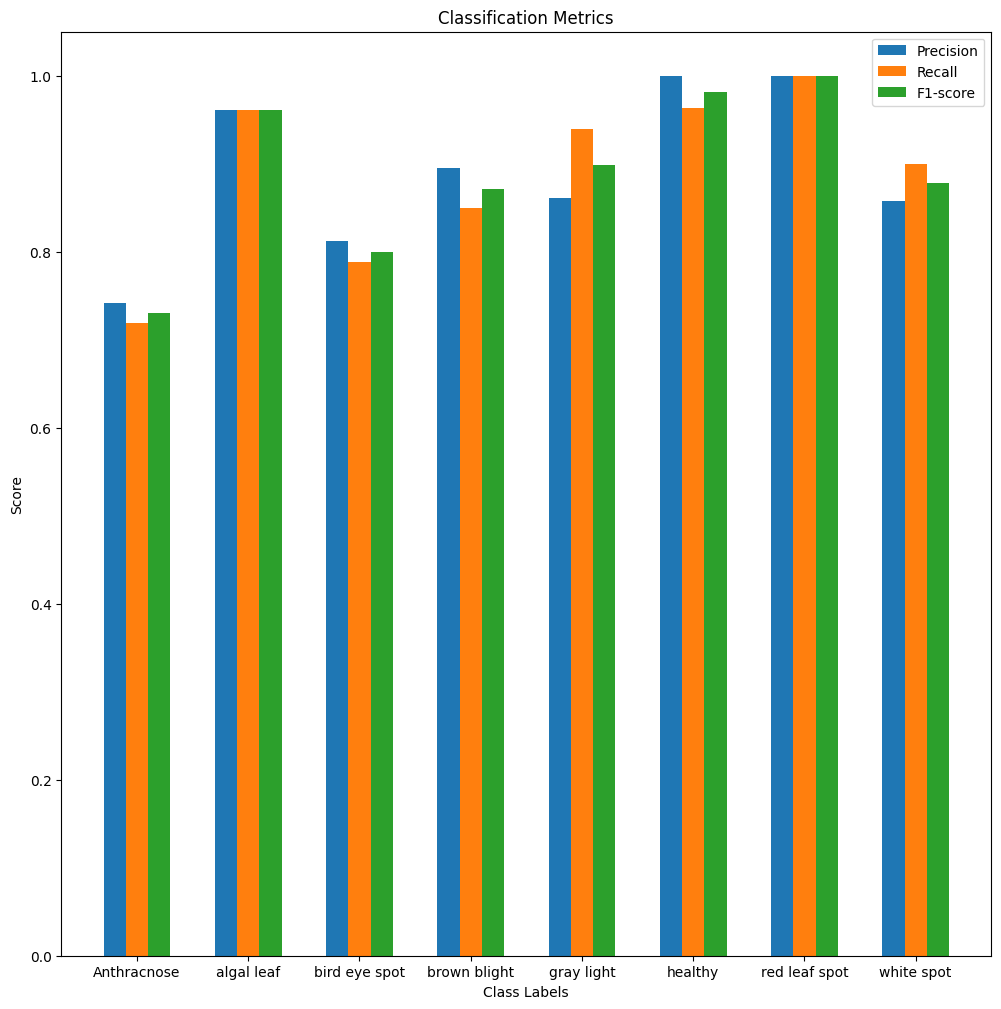

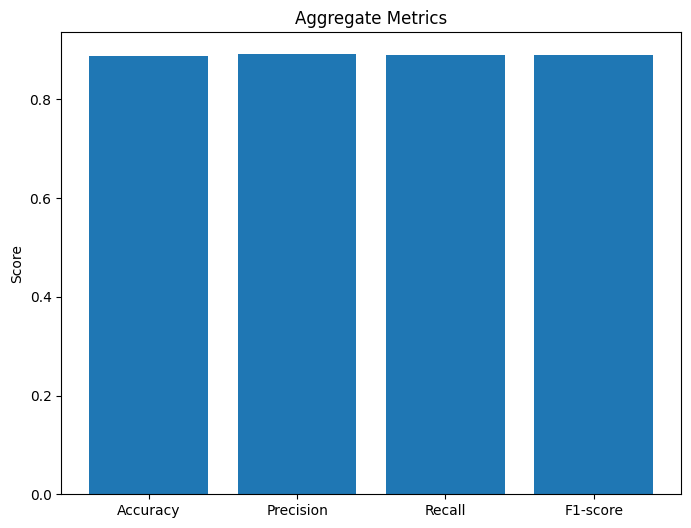

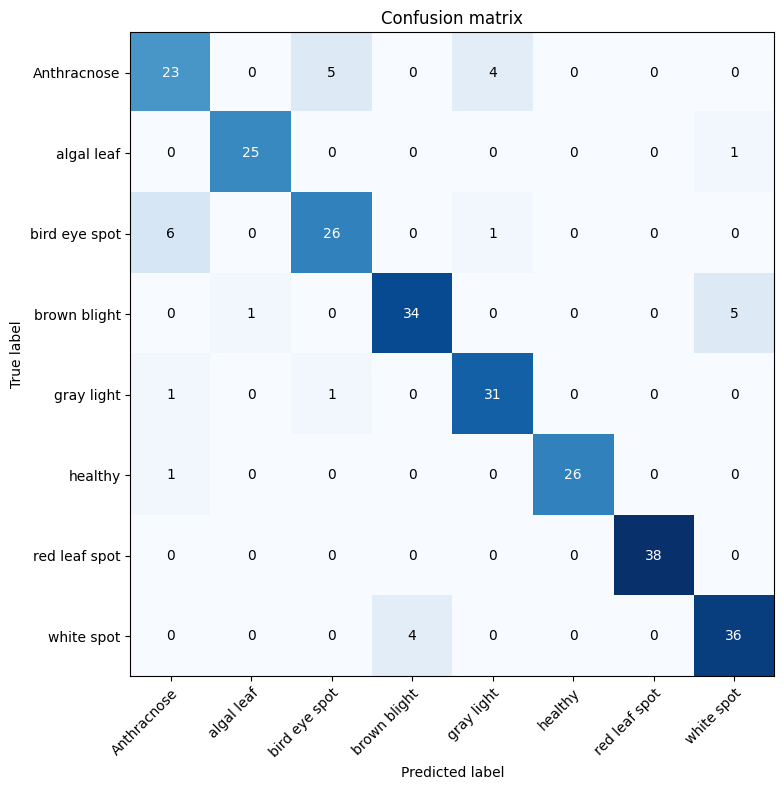

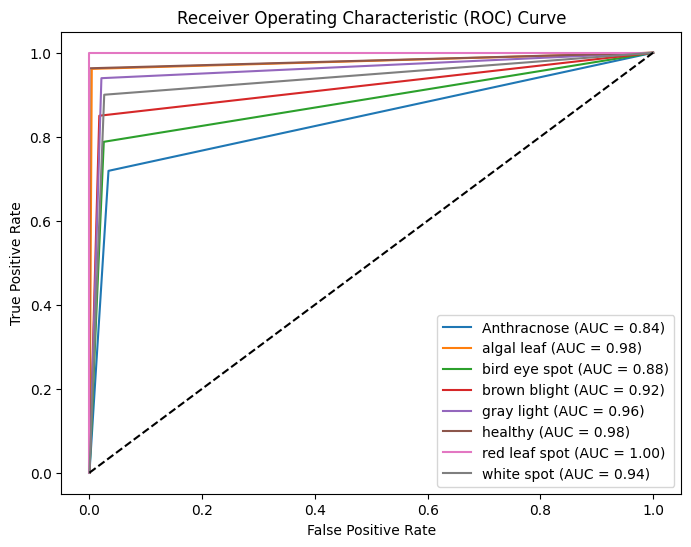

In [ ]:
#RF

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

def apply_random_forest(data, labels):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

    # Create a random forest classifier with 100 trees
    clf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Fit the algorithm to the training data
    clf.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = clf.predict(X_test)

    # Get training accuracy
    train_accuracy = clf.score(X_train, y_train)
    print("Training accuracy:", train_accuracy)

    # Print the accuracy score of the algorithm
    #print("Accuracy:", clf.score(X_test, y_test))
    class_labels = clf.classes_
    #print("class_labels : ",class_labels)
    #print("y_pred :",y_pred)
    #print("y_test : ",y_test)
    evaluate_classification(y_test.astype(int),y_pred.astype(int),class_labels,list(train_batches_vgg16.class_indices.keys()))
    return y_pred

apply_random_forest(transformed_data,true_labels)

accuracy :  0.9070631970260223
Training accuracy: 0.9696485623003195
               precision    recall  f1-score   support

  Anthracnose       0.80      0.75      0.77        32
   algal leaf       0.96      0.96      0.96        26
bird eye spot       0.82      0.85      0.84        33
 brown blight       0.90      0.93      0.91        40
   gray light       0.91      0.94      0.93        33
      healthy       1.00      0.96      0.98        27
red leaf spot       0.97      0.97      0.97        38
   white spot       0.90      0.90      0.90        40

     accuracy                           0.91       269
    macro avg       0.91      0.91      0.91       269
 weighted avg       0.91      0.91      0.91       269

Accuracy:  0.9070631970260223
Precision 0.90911947676276
Recall :  0.9076330528633161
F1 score :  0.9081653215859874


(SVC(kernel='linear'),
 0.9070631970260223,
 array([6, 4, 4, 6, 0, 2, 2, 3, 1, 1, 1, 6, 4, 2, 3, 7, 5, 6, 3, 1, 2, 4,
        1, 5, 5, 5, 0, 6, 0, 3, 5, 1, 7, 2, 1, 6, 4, 1, 7, 6, 1, 4, 6, 6,
        3, 4, 0, 3, 1, 7, 4, 7, 3, 7, 2, 6, 0, 0, 1, 2, 7, 4, 4, 1, 1, 7,
        0, 3, 5, 6, 2, 0, 4, 7, 7, 5, 7, 7, 3, 2, 0, 0, 3, 4, 1, 2, 2, 2,
        7, 2, 1, 5, 6, 3, 0, 2, 6, 3, 3, 3, 7, 5, 2, 3, 5, 4, 7, 6, 2, 1,
        7, 2, 5, 4, 4, 7, 0, 2, 3, 6, 5, 2, 2, 0, 7, 6, 6, 1, 7, 7, 3, 0,
        4, 7, 7, 7, 2, 0, 6, 0, 7, 7, 3, 5, 7, 3, 0, 4, 2, 6, 5, 5, 6, 1,
        0, 6, 6, 0, 6, 6, 2, 7, 4, 3, 0, 0, 3, 3, 0, 7, 2, 3, 6, 7, 4, 7,
        2, 0, 0, 3, 6, 3, 6, 7, 1, 5, 3, 0, 0, 7, 5, 2, 5, 0, 2, 4, 5, 7,
        7, 5, 3, 6, 5, 6, 7, 5, 6, 3, 6, 4, 3, 3, 3, 5, 3, 0, 5, 1, 4, 3,
        1, 1, 3, 2, 7, 2, 6, 2, 3, 2, 3, 5, 2, 3, 7, 4, 7, 7, 1, 6, 2, 4,
        4, 3, 4, 3, 4, 6, 1, 4, 0, 1, 4, 0, 6, 6, 3, 7, 2, 1, 4, 5, 3, 6,
        6, 4, 4, 4, 4], dtype=int32))

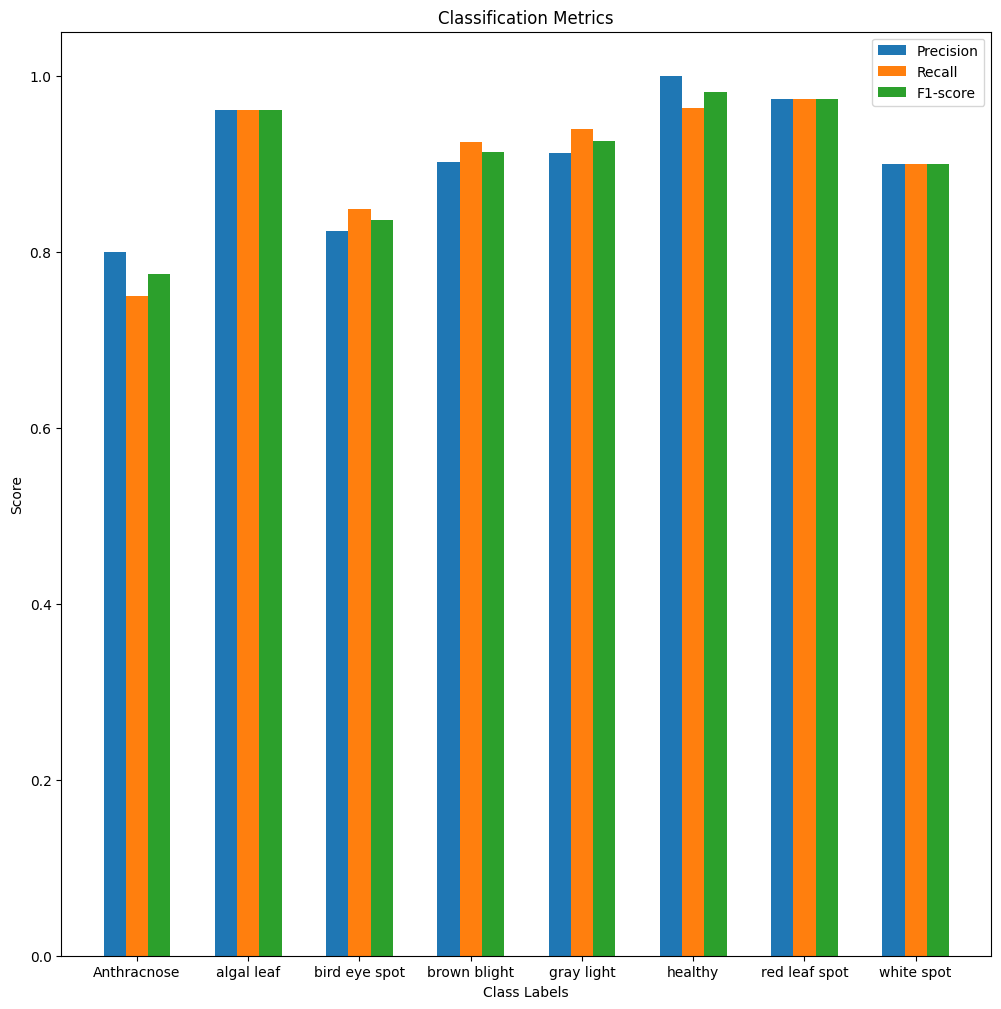

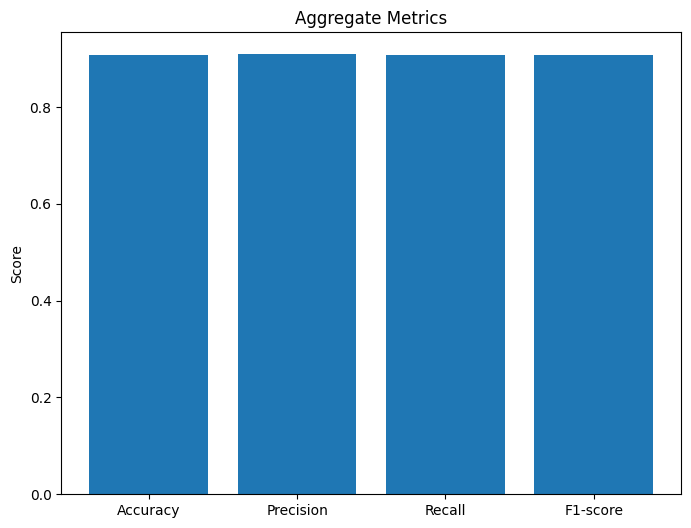

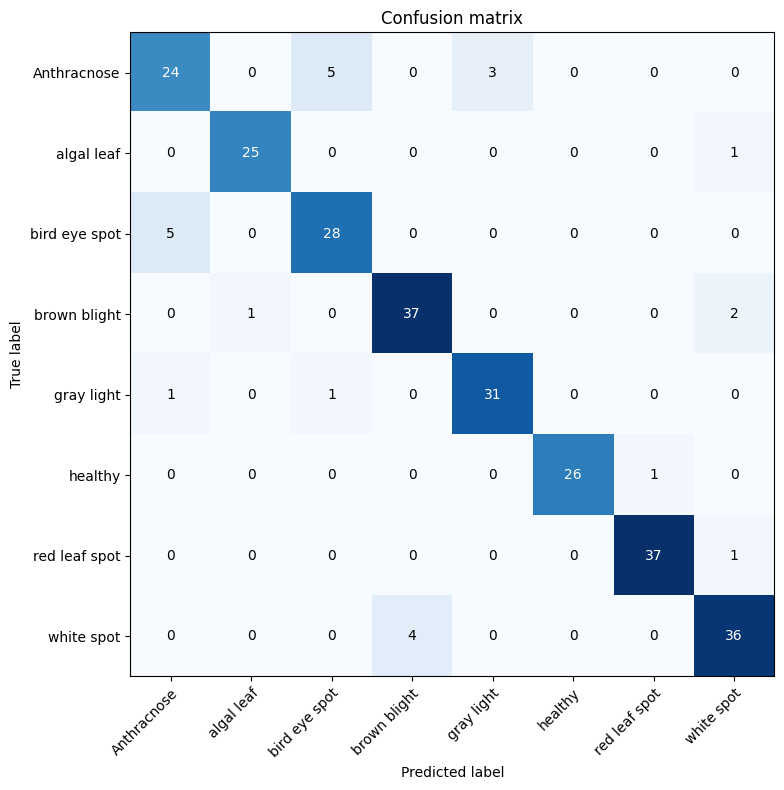

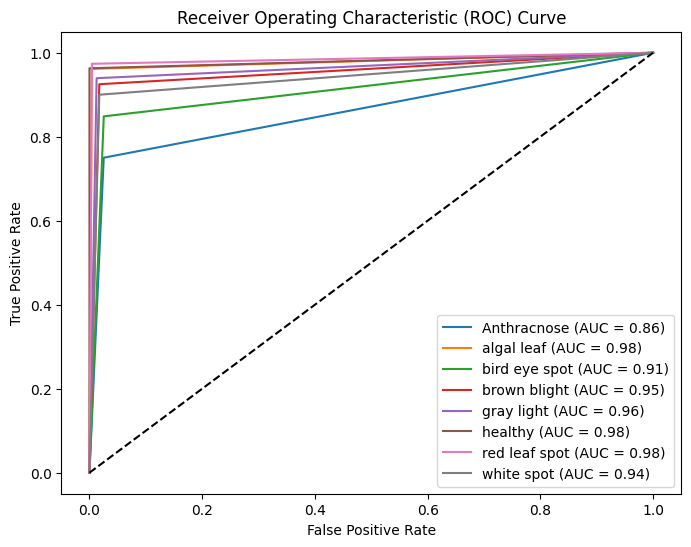

In [ ]:
#SVM

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

def apply_svm(data, labels):
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

    # Create SVM model and fit to training data
    model = SVC(kernel='linear')
    model.fit(X_train, y_train)

    # Evaluate model on test data
    accuracy = model.score(X_test, y_test)
    print("accuracy : ",accuracy)
    # Get predictions for test data
    train_accuracy = model.score(X_train, y_train)
    print("Training accuracy:", train_accuracy)

    predictions = model.predict(X_test)
    class_labels = model.classes_
    evaluate_classification(y_test.astype(int),predictions.astype(int),class_labels,list(train_batches_vgg16.class_indices.keys()))
    return model, accuracy, predictions


apply_svm(transformed_data,true_labels)

Accuracy: 0.79182156133829
Training accuracy: 1.0
               precision    recall  f1-score   support

  Anthracnose       0.62      0.72      0.67        32
   algal leaf       0.79      0.85      0.81        26
bird eye spot       0.73      0.67      0.70        33
 brown blight       0.79      0.75      0.77        40
   gray light       0.79      0.67      0.72        33
      healthy       1.00      0.96      0.98        27
red leaf spot       0.90      0.97      0.94        38
   white spot       0.76      0.78      0.77        40

     accuracy                           0.79       269
    macro avg       0.80      0.79      0.79       269
 weighted avg       0.79      0.79      0.79       269

Accuracy:  0.79182156133829
Precision 0.7967992244949882
Recall :  0.7949855441220572
F1 score :  0.7942136824414261


(DecisionTreeClassifier(),
 0.79182156133829,
 array([6, 4, 4, 6, 0, 2, 2, 3, 7, 1, 1, 6, 2, 2, 1, 7, 5, 6, 3, 1, 2, 4,
        1, 5, 5, 5, 0, 6, 0, 3, 5, 1, 3, 2, 7, 6, 4, 1, 7, 6, 1, 6, 6, 6,
        7, 4, 0, 3, 1, 7, 4, 7, 3, 7, 2, 6, 0, 0, 1, 2, 3, 4, 4, 1, 1, 7,
        4, 3, 5, 3, 2, 0, 2, 1, 7, 5, 7, 7, 3, 0, 0, 0, 3, 4, 1, 0, 2, 2,
        7, 4, 1, 5, 6, 3, 4, 2, 6, 3, 3, 7, 7, 5, 2, 7, 5, 4, 7, 6, 2, 1,
        7, 0, 5, 4, 4, 7, 0, 2, 3, 6, 5, 0, 2, 0, 7, 6, 6, 1, 7, 1, 3, 0,
        6, 7, 7, 7, 2, 2, 6, 0, 7, 7, 3, 5, 3, 3, 0, 0, 2, 6, 5, 5, 6, 7,
        0, 6, 6, 0, 6, 6, 4, 3, 4, 3, 0, 0, 3, 3, 0, 3, 2, 7, 6, 7, 0, 7,
        2, 0, 0, 1, 6, 6, 6, 7, 1, 5, 7, 0, 0, 7, 5, 2, 5, 0, 0, 4, 5, 7,
        7, 5, 7, 6, 5, 6, 7, 5, 6, 3, 6, 4, 3, 3, 3, 5, 3, 0, 5, 1, 2, 1,
        1, 1, 3, 0, 7, 2, 6, 2, 3, 2, 3, 5, 2, 3, 7, 0, 7, 7, 1, 6, 2, 4,
        4, 3, 4, 3, 4, 6, 1, 4, 0, 1, 4, 0, 6, 6, 3, 3, 2, 1, 0, 5, 3, 6,
        6, 4, 4, 6, 4], dtype=int32))

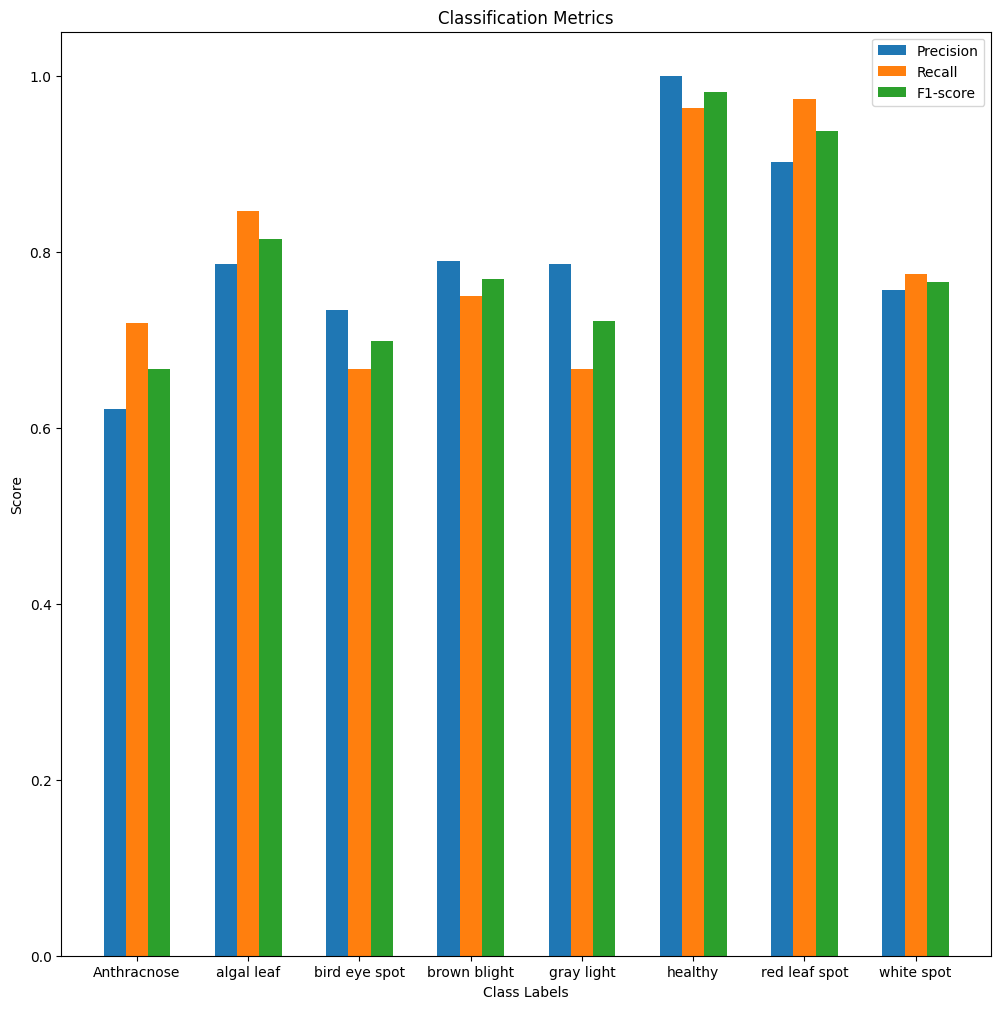

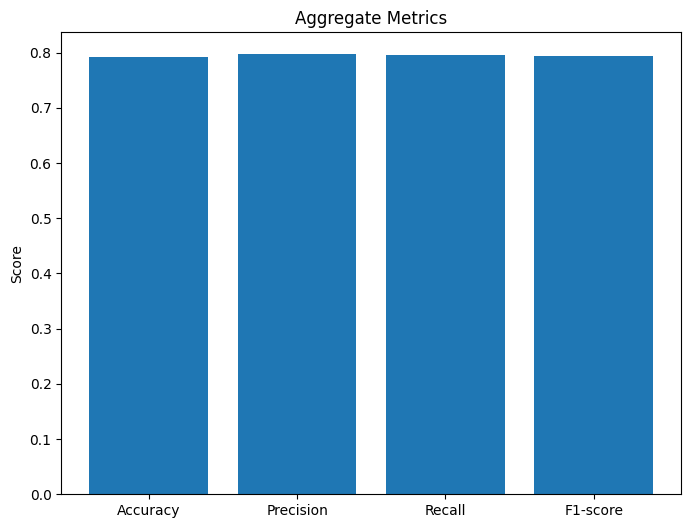

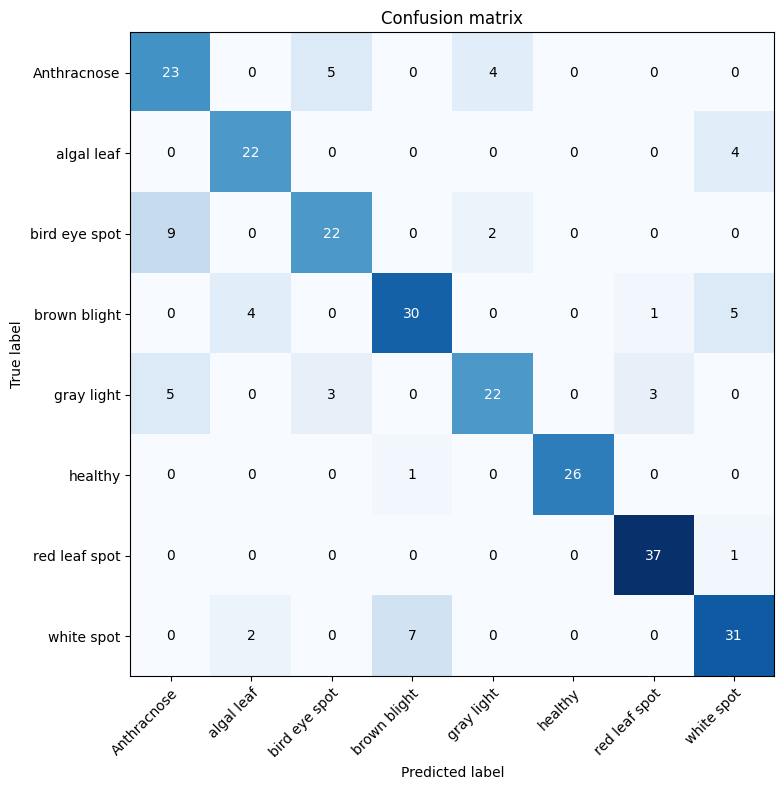

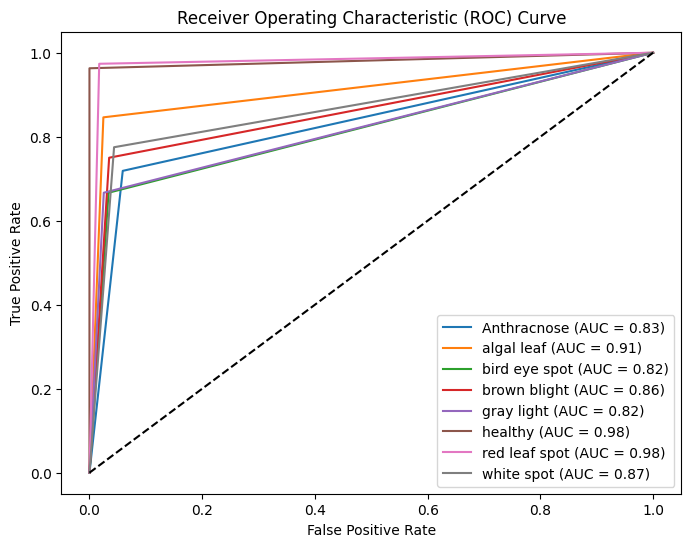

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

def apply_decision_tree(data, labels):
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

    # Create decision tree model and fit to training data
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    # Evaluate model on test data
    accuracy = model.score(X_test, y_test)
    print("Accuracy:", accuracy)

    train_accuracy = model.score(X_train, y_train)
    print("Training accuracy:", train_accuracy)


    # Get predictions for test data
    predictions = model.predict(X_test)
    class_labels = model.classes_
    evaluate_classification(y_test.astype(int), predictions.astype(int), class_labels, list(train_batches_vgg16.class_indices.keys()))

    return model, accuracy, predictions

apply_decision_tree(transformed_data, true_labels)


accuracy :  0.8847583643122676
Training accuracy: 0.9089456869009584
               precision    recall  f1-score   support

  Anthracnose       0.77      0.62      0.69        32
   algal leaf       0.93      0.96      0.94        26
bird eye spot       0.75      0.82      0.78        33
 brown blight       0.95      0.90      0.92        40
   gray light       0.81      0.91      0.86        33
      healthy       1.00      0.96      0.98        27
red leaf spot       1.00      0.97      0.99        38
   white spot       0.88      0.93      0.90        40

     accuracy                           0.88       269
    macro avg       0.89      0.88      0.88       269
 weighted avg       0.89      0.88      0.88       269

Accuracy:  0.8847583643122676
Precision 0.8855360384965648
Recall :  0.8844322952875585
F1 score :  0.8832647051536813


(KNeighborsClassifier(),
 0.8847583643122676,
 array([6, 4, 4, 6, 0, 2, 2, 3, 1, 1, 1, 6, 4, 2, 3, 7, 5, 6, 7, 1, 2, 4,
        1, 5, 5, 5, 0, 6, 2, 3, 5, 1, 7, 2, 1, 6, 4, 1, 7, 6, 1, 4, 6, 6,
        3, 4, 0, 3, 1, 7, 4, 7, 3, 7, 2, 6, 0, 0, 1, 2, 7, 4, 4, 1, 1, 7,
        4, 3, 5, 2, 0, 2, 4, 7, 7, 5, 7, 7, 7, 2, 4, 2, 3, 2, 1, 2, 2, 2,
        7, 2, 1, 5, 6, 3, 4, 2, 6, 3, 3, 7, 7, 5, 2, 7, 5, 4, 7, 6, 2, 1,
        7, 2, 5, 4, 4, 7, 0, 2, 3, 6, 5, 0, 2, 0, 7, 6, 6, 1, 1, 3, 3, 0,
        4, 7, 7, 7, 2, 0, 6, 0, 7, 7, 3, 5, 7, 3, 0, 4, 0, 6, 5, 5, 6, 1,
        0, 6, 6, 0, 6, 6, 2, 7, 4, 3, 0, 0, 3, 7, 0, 3, 2, 3, 6, 7, 4, 7,
        2, 0, 0, 3, 6, 3, 6, 7, 1, 5, 3, 2, 0, 7, 5, 2, 5, 0, 2, 4, 5, 7,
        7, 5, 3, 6, 5, 6, 7, 5, 6, 3, 6, 4, 3, 3, 3, 5, 3, 0, 5, 1, 4, 3,
        1, 1, 3, 2, 7, 2, 6, 2, 3, 4, 3, 5, 2, 3, 7, 4, 7, 7, 1, 6, 2, 4,
        4, 3, 4, 3, 4, 6, 1, 4, 0, 1, 4, 0, 6, 6, 3, 7, 2, 1, 4, 5, 3, 6,
        6, 4, 4, 4, 4], dtype=int32))

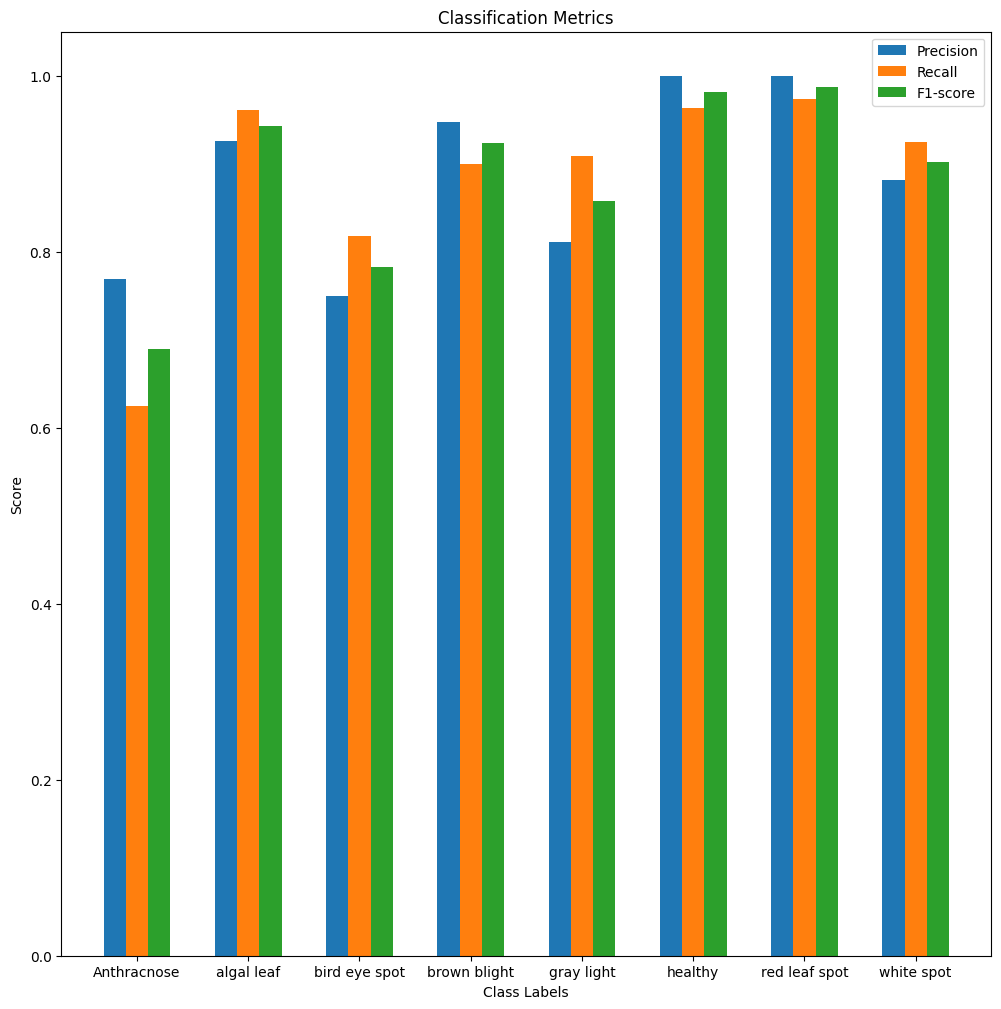

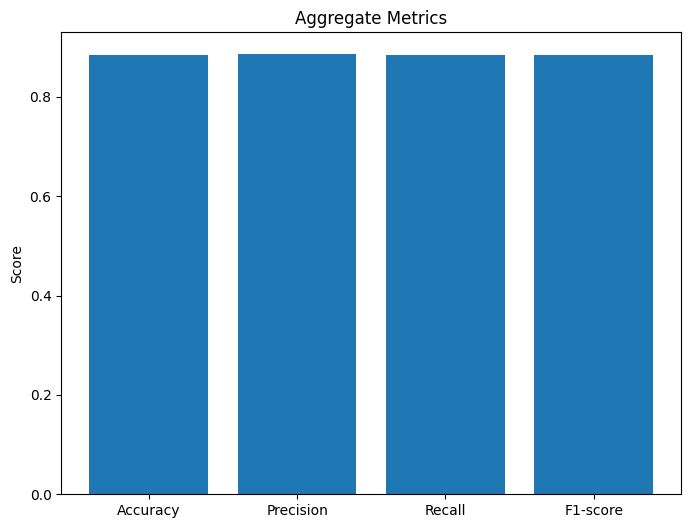

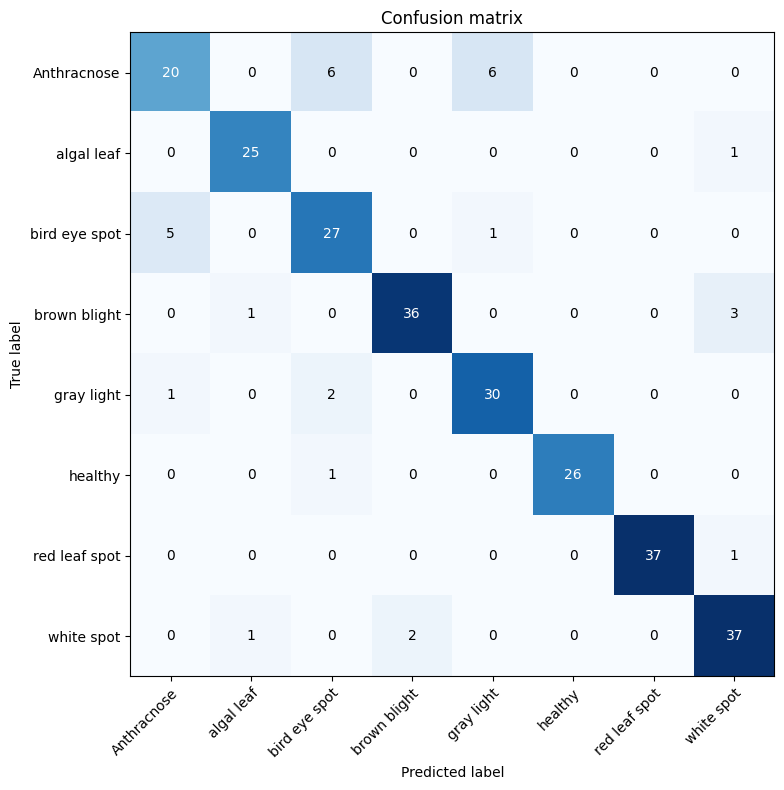

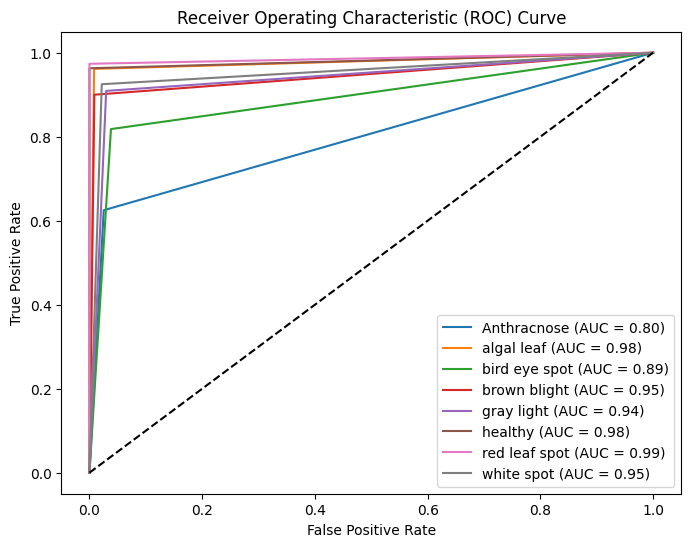

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

def apply_knn(data, labels):
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

    # Create KNN model and fit to training data
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)

    # Evaluate model on test data
    accuracy = model.score(X_test, y_test)
    print("accuracy : ",accuracy)

    train_accuracy = model.score(X_train, y_train)
    print("Training accuracy:", train_accuracy)


    # Get predictions for test data
    predictions = model.predict(X_test)
    class_labels = model.classes_
    evaluate_classification(y_test.astype(int),predictions.astype(int),class_labels,list(train_batches_vgg16.class_indices.keys()))
    return model, accuracy, predictions


apply_knn(transformed_data,true_labels)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9033457249070632
Training accuracy: 0.9568690095846646
               precision    recall  f1-score   support

  Anthracnose       0.77      0.72      0.74        32
   algal leaf       0.96      0.96      0.96        26
bird eye spot       0.82      0.85      0.84        33
 brown blight       0.90      0.93      0.91        40
   gray light       0.89      0.94      0.91        33
      healthy       1.00      0.96      0.98        27
red leaf spot       1.00      0.97      0.99        38
   white spot       0.90      0.90      0.90        40

     accuracy                           0.90       269
    macro avg       0.90      0.90      0.90       269
 weighted avg       0.90      0.90      0.90       269

Accuracy:  0.9033457249070632
Precision 0.9049859812592955
Recall :  0.9037268028633161
F1 score :  0.9040548169832644


(LogisticRegression(random_state=42),
 0.9033457249070632,
 array([6, 4, 4, 6, 0, 2, 2, 3, 1, 1, 1, 6, 4, 2, 3, 7, 5, 6, 3, 1, 2, 4,
        1, 5, 5, 5, 2, 6, 0, 3, 5, 1, 7, 2, 1, 6, 4, 1, 7, 6, 1, 4, 6, 6,
        3, 4, 0, 3, 1, 7, 4, 7, 3, 7, 2, 6, 0, 0, 1, 2, 7, 4, 4, 1, 1, 7,
        0, 3, 5, 0, 2, 0, 4, 7, 7, 5, 7, 7, 3, 2, 0, 0, 3, 4, 1, 2, 2, 2,
        7, 2, 1, 5, 6, 3, 0, 2, 6, 3, 3, 3, 7, 5, 2, 3, 5, 4, 7, 6, 2, 1,
        7, 2, 5, 4, 4, 7, 0, 2, 3, 6, 5, 2, 2, 0, 7, 6, 6, 1, 7, 7, 3, 0,
        4, 7, 7, 7, 2, 0, 6, 0, 7, 7, 3, 5, 7, 3, 0, 4, 2, 6, 5, 5, 6, 1,
        0, 6, 6, 0, 6, 6, 2, 7, 4, 3, 0, 0, 3, 3, 0, 7, 2, 3, 6, 7, 4, 7,
        2, 0, 0, 3, 6, 3, 6, 7, 1, 5, 3, 0, 0, 7, 5, 2, 5, 0, 2, 4, 5, 7,
        7, 5, 3, 6, 5, 6, 7, 5, 6, 3, 6, 4, 3, 3, 3, 5, 3, 0, 5, 1, 4, 3,
        1, 1, 3, 2, 7, 2, 6, 2, 3, 4, 3, 5, 2, 3, 7, 4, 7, 7, 1, 6, 2, 4,
        4, 3, 4, 3, 4, 6, 1, 4, 0, 1, 4, 0, 6, 6, 3, 7, 2, 1, 4, 5, 3, 6,
        6, 4, 4, 4, 4], dtype=int32))

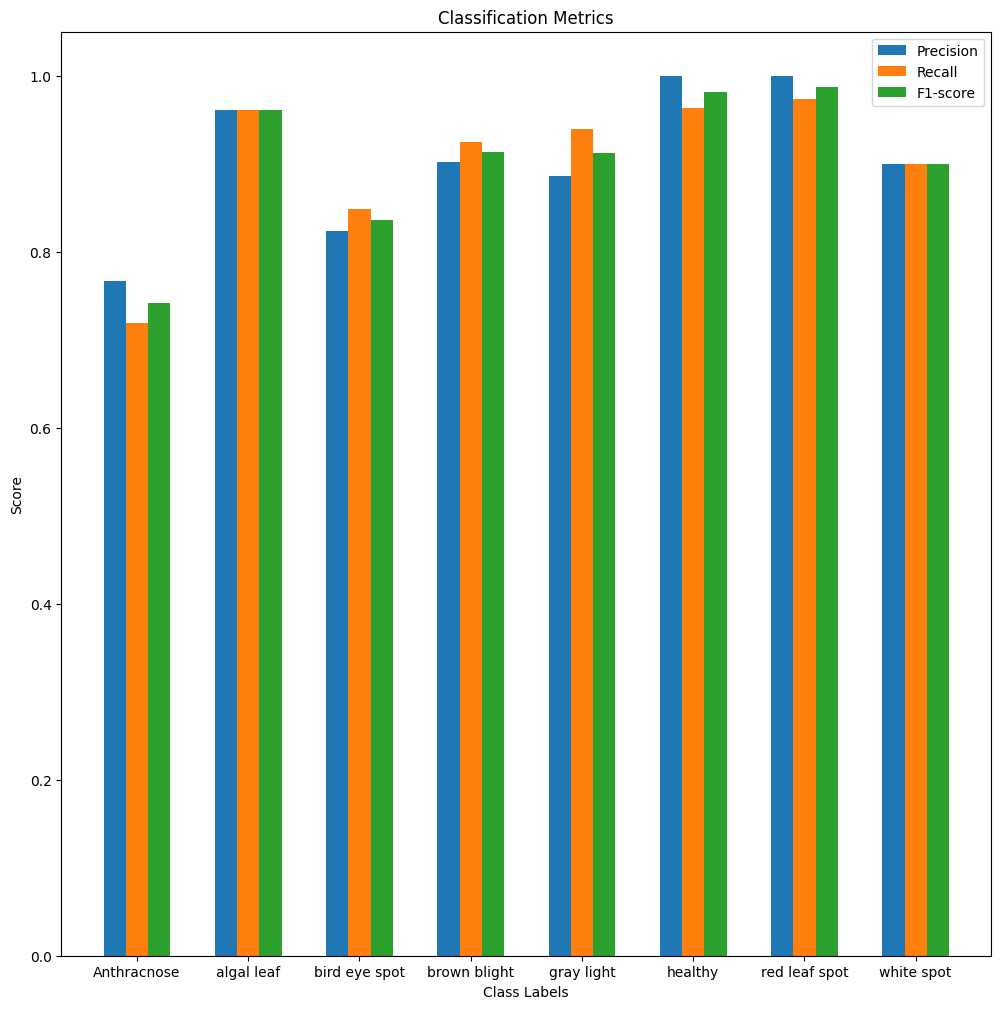

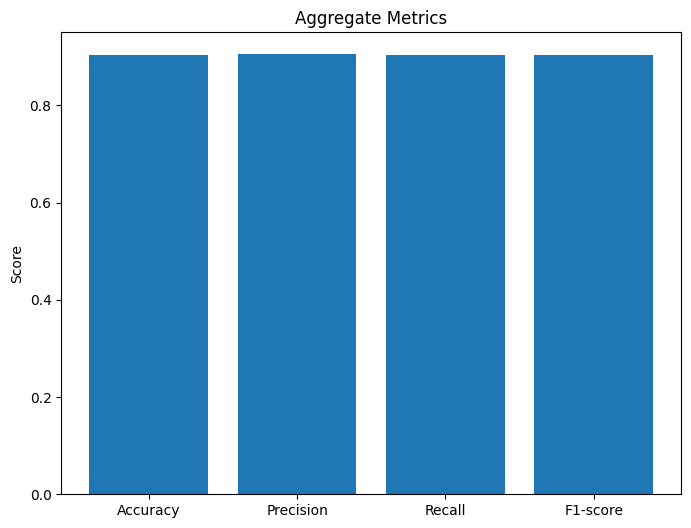

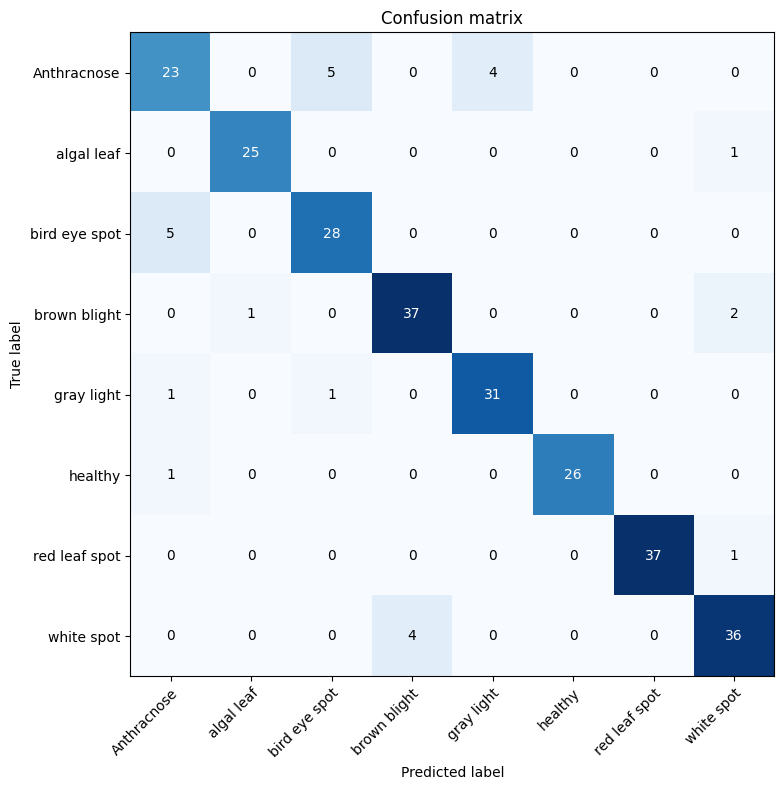

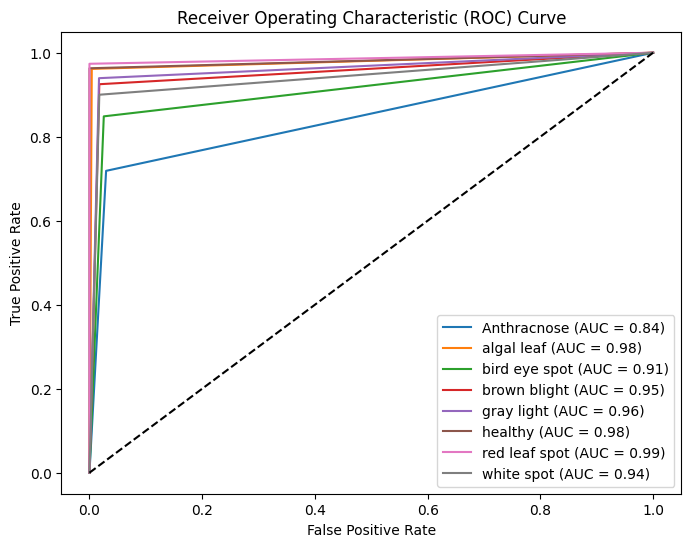

In [ ]:
#logisticregression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def apply_logistic_regression(data, labels):
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

    # Create logistic regression model and fit to training data
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # Evaluate model on test data
    accuracy = model.score(X_test, y_test)
    print("Accuracy:", accuracy)

    # Get predictions for test data
    predictions = model.predict(X_test)

    train_accuracy = model.score(X_train, y_train)
    print("Training accuracy:", train_accuracy)


    # Define class labels and integer labels
    class_labels = [str(i) for i in model.classes_]
    class_labels_int = [i for i in range(len(class_labels))]

    # Evaluate model using metrics
    evaluate_classification(y_test, predictions, class_labels_int, list(train_batches_vgg16.class_indices.keys()))

    return model, accuracy, predictions


apply_logistic_regression(transformed_data, true_labels)


Accuracy: 0.8921933085501859
Training accuracy: 0.9057507987220448
               precision    recall  f1-score   support

  Anthracnose       0.77      0.72      0.74        32
   algal leaf       1.00      0.88      0.94        26
bird eye spot       0.84      0.79      0.81        33
 brown blight       0.86      0.95      0.90        40
   gray light       0.82      0.94      0.87        33
      healthy       1.00      0.96      0.98        27
red leaf spot       1.00      0.97      0.99        38
   white spot       0.90      0.90      0.90        40

     accuracy                           0.89       269
    macro avg       0.90      0.89      0.89       269
 weighted avg       0.89      0.89      0.89       269

Accuracy:  0.8921933085501859
Precision 0.8981002726758245
Recall :  0.8896606606721738
F1 score :  0.8923763846993796


(GaussianNB(),
 0.8921933085501859,
 array([6, 4, 4, 6, 0, 2, 2, 3, 1, 1, 1, 6, 4, 2, 3, 7, 5, 6, 3, 1, 2, 4,
        1, 5, 5, 5, 0, 6, 2, 3, 5, 3, 7, 2, 3, 6, 4, 1, 7, 6, 1, 4, 6, 6,
        3, 4, 0, 3, 1, 7, 4, 7, 3, 7, 2, 6, 0, 0, 1, 2, 7, 4, 4, 1, 1, 7,
        0, 3, 5, 0, 0, 2, 4, 7, 7, 5, 7, 7, 3, 2, 4, 0, 3, 4, 1, 2, 2, 0,
        7, 2, 1, 5, 6, 3, 4, 2, 6, 3, 3, 7, 7, 5, 2, 7, 5, 4, 7, 6, 2, 1,
        7, 2, 5, 4, 4, 7, 0, 2, 3, 6, 5, 0, 2, 4, 7, 6, 6, 1, 7, 3, 3, 0,
        4, 7, 7, 7, 2, 4, 6, 0, 7, 7, 3, 5, 7, 3, 0, 4, 0, 6, 5, 5, 6, 1,
        0, 6, 6, 0, 6, 6, 2, 7, 4, 3, 0, 0, 3, 3, 0, 3, 2, 3, 6, 7, 4, 7,
        2, 0, 0, 3, 6, 3, 6, 7, 1, 5, 3, 0, 0, 7, 5, 2, 5, 0, 2, 4, 5, 7,
        7, 5, 3, 6, 5, 6, 7, 5, 6, 3, 6, 4, 3, 3, 3, 5, 3, 0, 5, 1, 4, 3,
        1, 1, 3, 2, 7, 2, 6, 2, 3, 0, 3, 5, 2, 3, 7, 4, 7, 7, 3, 6, 2, 4,
        4, 3, 4, 3, 4, 6, 1, 4, 0, 1, 4, 0, 6, 6, 3, 7, 2, 1, 4, 5, 3, 6,
        6, 4, 4, 4, 4], dtype=int32))

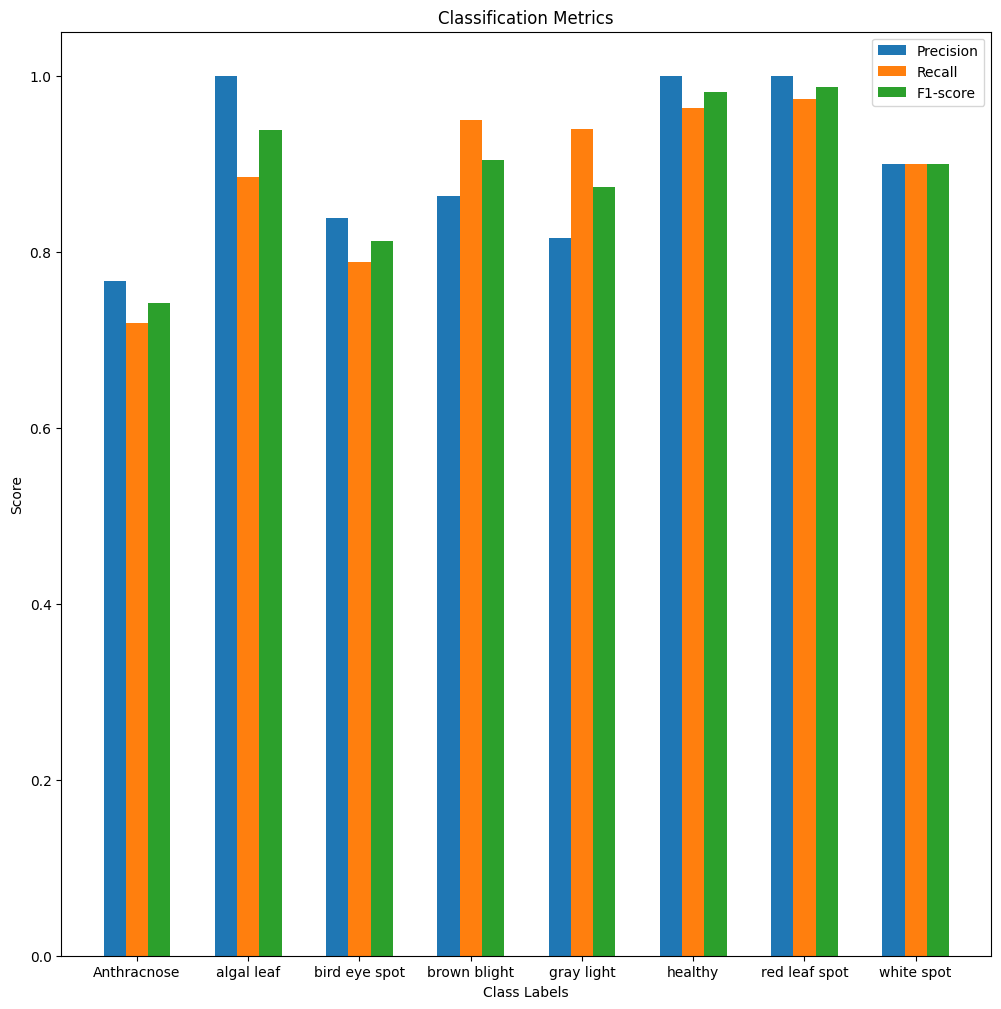

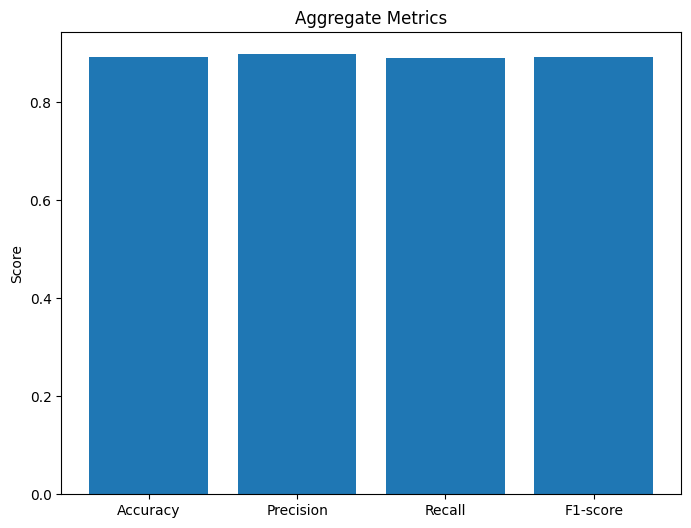

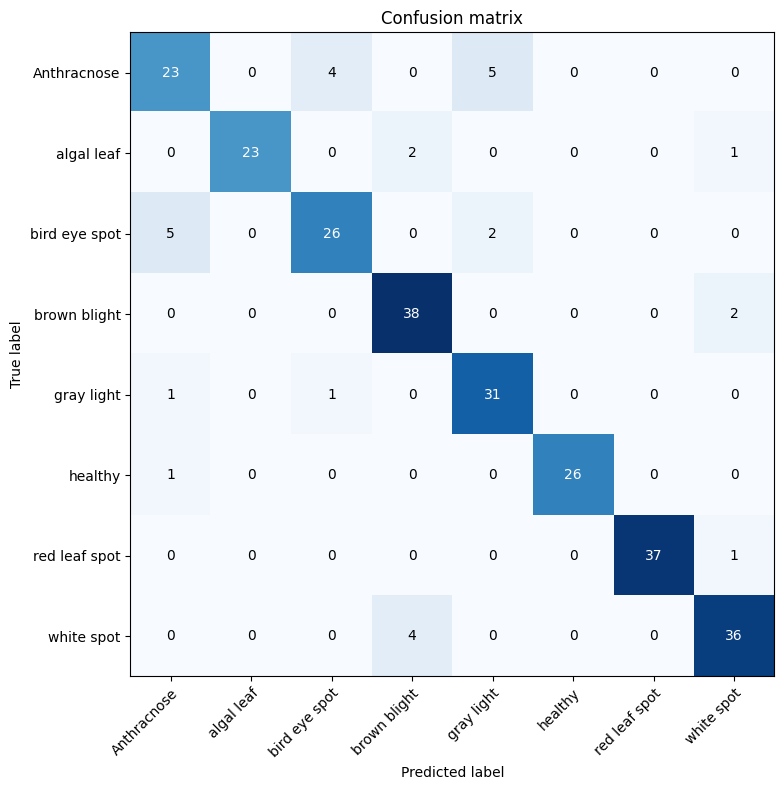

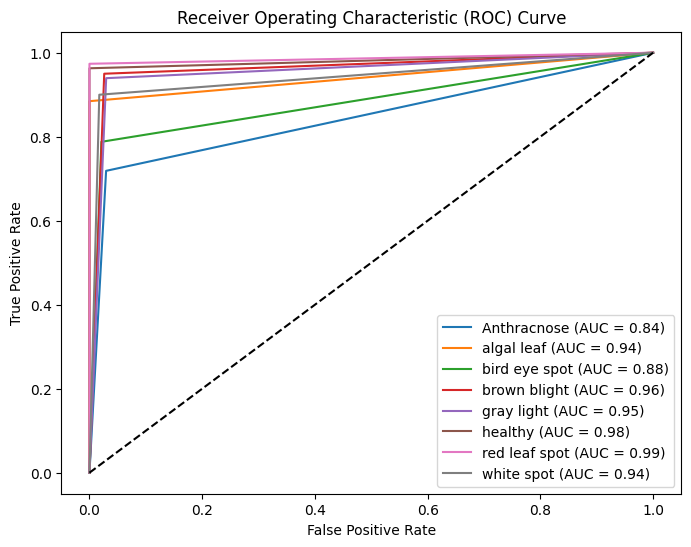

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

def apply_naive_bayes(data, labels):
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

    # Create Naive Bayes model and fit to training data
    model = GaussianNB()
    model.fit(X_train, y_train)

    # Evaluate model on test data
    accuracy = model.score(X_test, y_test)
    print("Accuracy:", accuracy)

    # Get predictions for test data
    predictions = model.predict(X_test)

    train_accuracy = model.score(X_train, y_train)
    print("Training accuracy:", train_accuracy)


    # Define class labels and integer labels
    class_labels = model.classes_
    class_labels_int = [i for i in range(len(class_labels))]

    # Evaluate model using metrics
    evaluate_classification(y_test, predictions, class_labels_int, list(train_batches_vgg16.class_indices.keys()))

    return model, accuracy, predictions

apply_naive_bayes(transformed_data, true_labels)




Accuracy: 0.8921933085501859
Training accuracy: 0.9249201277955271
class_labels :  [0 1 2 3 4 5 6 7]
class_labels_int :  [0, 1, 2, 3, 4, 5, 6, 7]
               precision    recall  f1-score   support

  Anthracnose       0.79      0.72      0.75        32
   algal leaf       0.96      0.92      0.94        26
bird eye spot       0.81      0.79      0.80        33
 brown blight       0.88      0.90      0.89        40
   gray light       0.86      0.97      0.91        33
      healthy       1.00      0.96      0.98        27
red leaf spot       1.00      0.97      0.99        38
   white spot       0.86      0.90      0.88        40

     accuracy                           0.89       269
    macro avg       0.90      0.89      0.89       269
 weighted avg       0.89      0.89      0.89       269

Accuracy:  0.8921933085501859
Precision 0.8957074938464236
Recall :  0.8920062317677449
F1 score :  0.8930371196305933


(LinearDiscriminantAnalysis(),
 0.8921933085501859,
 array([6, 4, 4, 6, 0, 2, 2, 3, 1, 1, 1, 6, 4, 2, 3, 7, 5, 6, 3, 1, 2, 4,
        1, 5, 5, 5, 0, 6, 2, 3, 5, 7, 7, 2, 1, 6, 4, 1, 7, 6, 1, 4, 6, 6,
        3, 4, 0, 3, 1, 7, 4, 7, 3, 7, 2, 6, 0, 0, 1, 2, 7, 4, 4, 1, 1, 7,
        0, 3, 5, 3, 0, 2, 4, 7, 7, 5, 7, 7, 3, 2, 4, 0, 3, 4, 1, 2, 0, 2,
        7, 2, 1, 5, 6, 3, 4, 2, 6, 3, 3, 7, 7, 5, 2, 3, 5, 4, 7, 6, 2, 1,
        7, 2, 5, 4, 4, 7, 0, 2, 3, 6, 5, 0, 2, 0, 7, 6, 6, 1, 7, 7, 3, 0,
        4, 7, 7, 7, 2, 0, 6, 0, 7, 7, 3, 5, 7, 3, 0, 4, 0, 6, 5, 5, 6, 1,
        0, 6, 6, 0, 6, 6, 2, 7, 4, 3, 0, 0, 3, 3, 4, 3, 2, 7, 6, 7, 4, 7,
        2, 0, 0, 3, 6, 3, 6, 7, 1, 5, 3, 0, 0, 7, 5, 2, 5, 0, 2, 4, 5, 7,
        7, 5, 3, 6, 5, 6, 7, 5, 6, 3, 6, 4, 3, 3, 3, 5, 3, 0, 5, 1, 4, 3,
        1, 1, 3, 2, 7, 2, 6, 2, 3, 2, 3, 5, 2, 3, 7, 4, 7, 7, 1, 6, 2, 4,
        4, 3, 4, 3, 4, 6, 1, 4, 0, 1, 4, 0, 6, 6, 3, 7, 2, 1, 4, 5, 3, 6,
        6, 4, 4, 4, 4], dtype=int32))

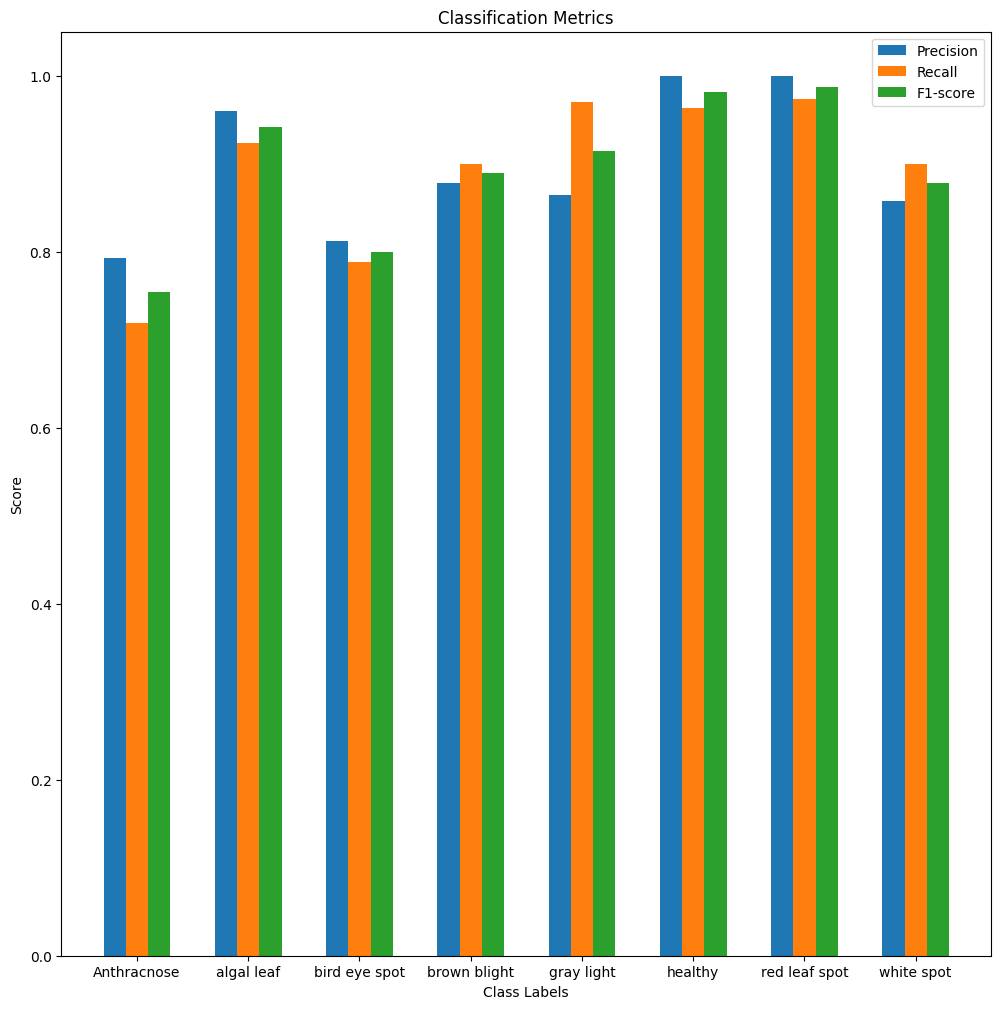

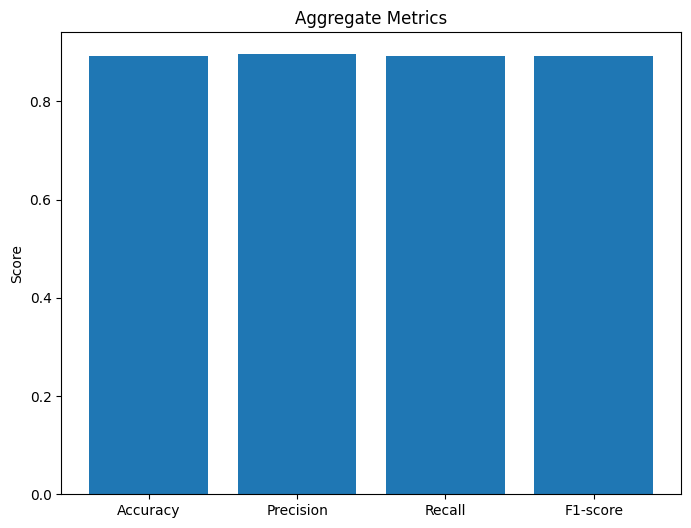

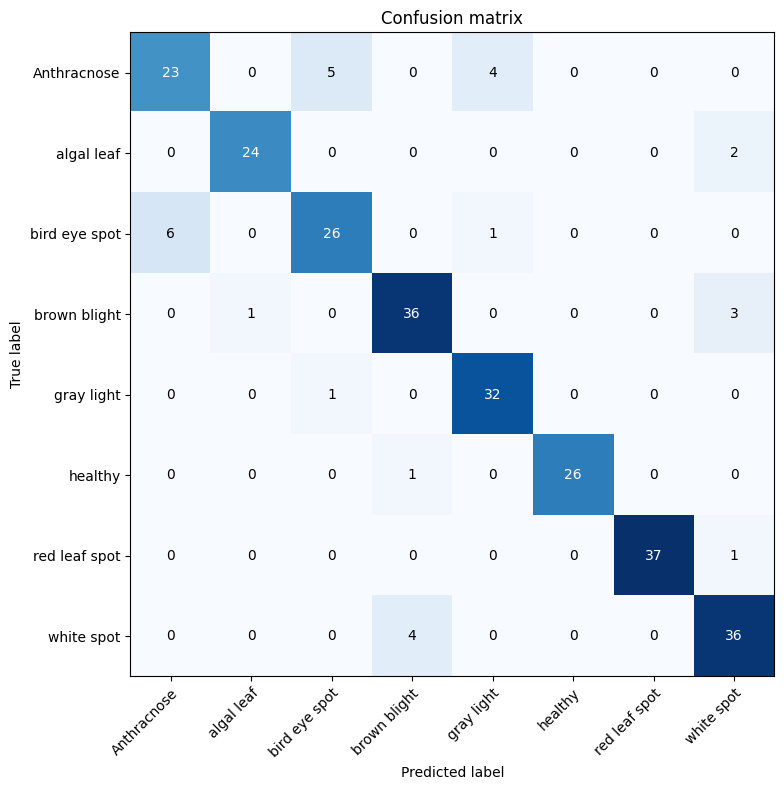

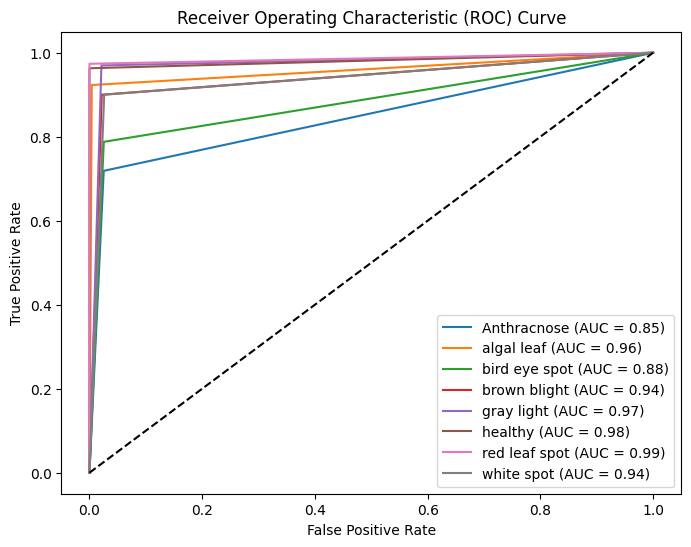

In [ ]:
#Linear Discriminant Analysis (LDA)



from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

def apply_lda(data, labels):
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

    # Create LDA model and fit to training data
    model = LinearDiscriminantAnalysis()
    model.fit(X_train, y_train)

    # Evaluate model on test data
    accuracy = model.score(X_test, y_test)
    print("Accuracy:", accuracy)

    # Get predictions for test data
    predictions = model.predict(X_test)

    train_accuracy = model.score(X_train, y_train)
    print("Training accuracy:", train_accuracy)


    # Define class labels and integer labels
    class_labels = model.classes_
    print("class_labels : ",class_labels)

    class_labels_int = [i for i in range(len(class_labels))]
    print("class_labels_int : ",class_labels_int)

    # Evaluate model using metrics
    evaluate_classification(y_test, predictions, class_labels_int, list(train_batches_vgg16.class_indices.keys()))

    return model, accuracy, predictions

apply_lda(transformed_data, true_labels)
